<a href="https://colab.research.google.com/github/Viny2030/UNED/blob/main/analisislibrosentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string

In [4]:
###TextBlob('Odio el código spaguetti').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [5]:
###TextBlob('Odio el código spaguetti').translate(from_lang='es', to='en').sentiment #fr, pt, it

Sentiment(polarity=-0.8, subjectivity=0.9)

Uso de TextBlob

In [110]:
frankie = pd.read_fwf('https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/frankie.txt', sep='\t', header=None) ## libro con 4661 registros
frankie

,0
0,0
1,0 The studio was ﬁlled with the rich od...
2,"1 the garden, there came through the ope..."
3,2 pink-flowering thorn.
4,3 From the corner of the divan of Persi...
...,...
4656,4655 keep eBooks in compliance with any ...
4657,4656 Most people start at our website wh...
4658,4657 This website includes information abo...
4659,4658 Project Gutenberg Literary Archive Fo...


In [111]:
frankie.reset_index(drop=True, inplace=True) ## reseteo indice

In [112]:
import csv

frankie.to_csv('frankie.txt', sep=" ",
          quoting=csv.QUOTE_NONE, escapechar=" ")

In [113]:
text = open('frankie.txt', 'r').read()

In [89]:
len(text)

698163

In [114]:
TextBlob(text).sentiment

Sentiment(polarity=0.066398140897907, subjectivity=0.544691360927673)

In [117]:
def clean_text(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text

In [118]:
len(text)

698163

In [119]:
import pandas as pd
import re

# Assuming 'text' contains the content of 'frankie.txt' as a string
# Convert the string to a DataFrame
text_list = text.split('\n')  # Split the string into lines

# Modification: Keep each line as a single string in the 'text' column
df = pd.DataFrame(text_list, columns=['text']) # Create a DataFrame

# Remove empty rows if any
df = df[df['text'] != '']

def clean_text(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text



In [120]:
text_list

[' 0',
 '0 0',
 '1 0  The    studio    was    ﬁlled    with    the    rich    odour    of    roses,    and    when    the    light    summer    wind    stirred    amidst    the    trees    of',
 '2 1  the    garden,    there    came    through    the    open    door    the    heavy    scent    of    the    lilac,    or    the    more    delicate    perfume    of    the',
 '3 2  pink-flowering    thorn.',
 '4 3  From    the    corner    of    the    divan    of    Persian    saddle-bags    on    which    he    was    lying,    smoking,    as    was    his    custom,',
 '5 4  innumerable    cigarettes,    Lord    Henry    Wotton    could    just    catch    the    gleam    of    the    honey-sweet    and    honey-coloured',
 '6 5  blossoms    of    a    laburnum,    whose    tremulous    branches    seemed    hardly    able    to    bear    the    burden    of    a    beauty    so',
 '7 6  ﬂamelike    as    theirs;    and    now    and    then    the    fantastic    shadows    of    bird

In [121]:
# Now you can apply the function to the 'text' column of the DataFrame
df['clean_text'] = df['text'].astype(str).apply(clean_text)

# Display the 'clean_text' column
print(df['clean_text'])

0                                                       0
1                                                     0 0
2       1 0  The    studio    was    ﬁlled    with    ...
3       2 1  the    garden,    there    came    throug...
4                           3 2  pink-flowering    thorn.
                              ...                        
4657    4656 4655  keep    eBooks    in    compliance ...
4658    4657 4656  Most    people    start    at    ou...
4659    4658 4657  This    website    includes    info...
4660    4659 4658  Project    Gutenberg    Literary   ...
4661    4660 4659  subscribe    to    our    email    ...
Name: clean_text, Length: 4662, dtype: object


In [122]:
df['clean_text']

,clean_text
0,0
1,0 0
2,1 0 The studio was ﬁlled with ...
3,"2 1 the garden, there came throug..."
4,3 2 pink-flowering thorn.
...,...
4657,4656 4655 keep eBooks in compliance ...
4658,4657 4656 Most people start at ou...
4659,4658 4657 This website includes info...
4660,4659 4658 Project Gutenberg Literary ...


In [123]:
def get_polarity(text):
  analysis = TextBlob(text)
  if text != '':
    if analysis.detect_language() == 'en':
      result = analysis(from_lang = 'en').sentiment.polarity
      time.sleep(5)
      return result

In [124]:
!pip install langdetect

In [127]:
import pandas as pd
import re
from textblob import TextBlob
import time
from langdetect import detect  # Import the detect function

def get_polarity(text):
  if len(text) >= 3:  # Check if the text has at least 3 characters
    try:
      # Use langdetect for language detection
      if detect(text) == 'en':
        result = TextBlob(text)(from_lang='en').sentiment.polarity
        time.sleep(5)
        return result
    except:  # Handle potential errors in language detection
      return None
  else:
    return None

df['polarity'] = df['clean_text'].apply(get_polarity)

In [128]:
df['polarity'] = df['clean_text'].apply(get_polarity)

In [101]:
df['polarity'].head(3)

,polarity
0,None
1,None
2,None


In [102]:
df.head(3)

,text,clean_text,polarity
0,0,0,None
1,0 0,0 0,None
2,1 0 The studio was ﬁlled with ...,1 0 The studio was ﬁlled with ...,None


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4662 entries, 0 to 4661
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4662 non-null   object
 1   clean_text  4662 non-null   object
 2   polarity    0 non-null      object
dtypes: object(3)
memory usage: 145.7+ KB


In [130]:
df.polarity.value_counts()

,count
polarity,


In [104]:
df[df.polarity < 0.9][['text', 'polarity']].head()

,text,polarity


In [131]:
def x_range(x):
  if x is not None and x > 0:  # Check if x is not None before comparison
    return 1
  elif x is not None and x == 0:  # Check if x is not None before comparison
    return 0
  else:
    return -1

In [132]:
df['result'] = df['polarity'].apply(x_range)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4662 entries, 0 to 4661
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4662 non-null   object
 1   clean_text  4662 non-null   object
 2   polarity    0 non-null      object
 3   result      4662 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 182.1+ KB


In [134]:
df['result'].value_counts()

,count
result,
-1,4662


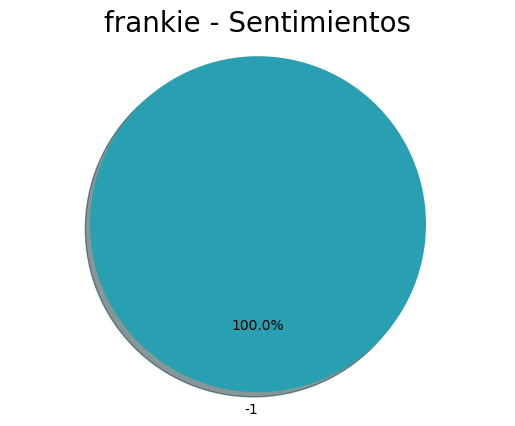

In [135]:
import matplotlib.pyplot as plt

# Get the value counts and their corresponding index (unique values in 'result')
value_counts = df['result'].value_counts()
labels = value_counts.index.tolist()  # Use the unique values as labels

# Ensure colors have the same length as labels
colors = ['#29A0B1', '#167D7F', '#98D7C2']  # Adjust if necessary
colors = colors[:len(labels)] # Shorten colors if there are fewer labels

plt.pie(value_counts, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('frankie - Sentimientos', fontsize=20)
plt.axis('equal')
plt.show()

Nube de términos

In [136]:
from wordcloud import WordCloud
text = ' '.join(df.clean_text)
text

' 0 0 0 1 0  The    studio    was    ﬁlled    with    the    rich    odour    of    roses,    and    when    the    light    summer    wind    stirred    amidst    the    trees    of 2 1  the    garden,    there    came    through    the    open    door    the    heavy    scent    of    the    lilac,    or    the    more    delicate    perfume    of    the 3 2  pink-flowering    thorn. 4 3  From    the    corner    of    the    divan    of    Persian    saddle-bags    on    which    he    was    lying,    smoking,    as    was    his    custom, 5 4  innumerable    cigarettes,    Lord    Henry    Wotton    could    just    catch    the    gleam    of    the    honey-sweet    and    honey-coloured 6 5  blossoms    of    a    laburnum,    whose    tremulous    branches    seemed    hardly    able    to    bear    the    burden    of    a    beauty    so 7 6  ﬂamelike    as    theirs;    and    now    and    then    the    fantastic    shadows    of    birds    in    ﬂight    ﬂitted    acr

In [137]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(text)

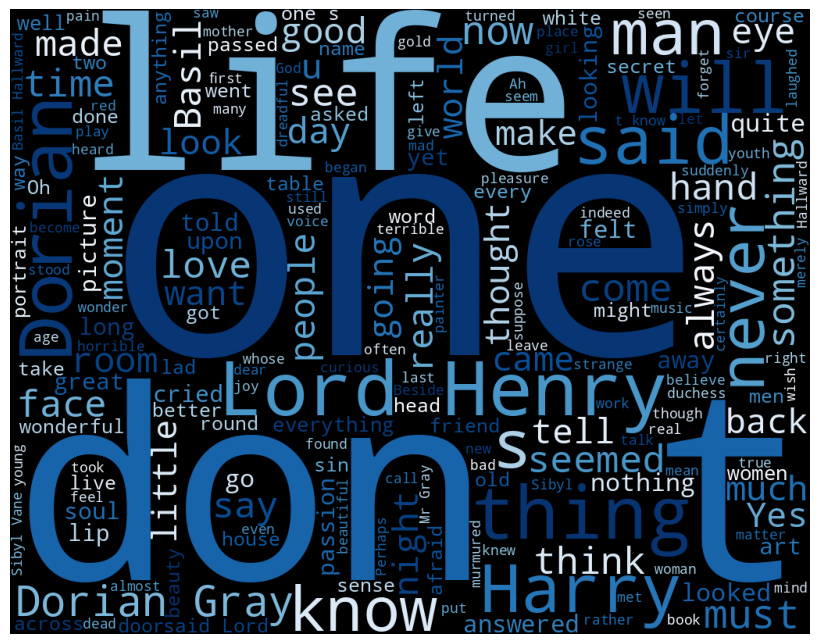

In [138]:
plt.figure(figsize= (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()